<a href="https://colab.research.google.com/github/akhil1297/akhil1297/blob/main/Module5_IndividualLab2_AkhilAchanta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=aea5efb8f5cc9c0b19b8d920c969bbe881eec6d11bdfde60f4d46aa359d0cde7
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
# Initialize Spark session
spark = SparkSession.builder.appName("BostonHousing").getOrCreate()

# Assuming 'file_path' is the path to your CSV file in Google Colab
file_path = "/content/BostonHousing.csv"

# Read CSV file into a PySpark DataFrame
boston = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows of the DataFrame to verify it loaded correctly
boston.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [ ]:
boston = boston.dropna()

In [ ]:
boston.head()

Row(crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, b=396.9, lstat=4.98, medv=24.0)

In [ ]:
#Loading the required packages
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.ml.regression import LinearRegression


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler


In [ ]:
#Initialize Spark session
spark = SparkSession.builder.appName("BostonHousing").getOrCreate()

In [ ]:
#Q3
#List of feature columns (excluding the target 'medv')
feature_columns = boston.columns[:-1]

#Initialize VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

#Transform the DataFrame
assembled_boston = assembler.transform(boston)

#Show the transformed DataFrame
assembled_boston.select("features", "medv").show()

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [ ]:
#Q4 -- Standardising features
from pyspark.ml.feature import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)

# Fit the StandardScaler on the data
scaler_model = scaler.fit(assembled_boston)

# Transform the data to apply standardization
scaled_boston = scaler_model.transform(assembled_boston)

# Show the scaled DataFrame
scaled_boston.select("scaledFeatures", "medv").show()

+--------------------+----+
|      scaledFeatures|medv|
+--------------------+----+
|[-0.4193669292132...|24.0|
|[-0.4169266699640...|21.6|
|[-0.4169289951277...|34.7|
|[-0.4163384035610...|33.4|
|[-0.4120740534296...|36.2|
|[-0.4166313741807...|28.7|
|[-0.4098372459997...|22.9|
|[-0.4032965606564...|27.1|
|[-0.3955433024705...|16.5|
|[-0.4003331395864...|18.9|
|[-0.3939563782803...|15.0|
|[-0.4064448322365...|18.9|
|[-0.4091989885782...|21.7|
|[-0.3468869279616...|20.4|
|[-0.3459336108657...|18.2|
|[-0.3471624598539...|19.9|
|[-0.2975736947220...|23.1|
|[-0.3289320142677...|17.5|
|[-0.3267800753110...|20.2|
|[-0.3357214921214...|18.2|
+--------------------+----+
only showing top 20 rows



In [ ]:
#Q5 -- Training the model for 2 PCA

from pyspark.ml.feature import PCA

#Initialize PCA
pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pcaFeatures")

#Fit the PCA model on the scaled data
pca_model = pca.fit(scaled_boston)

#Transform the data to apply PCA
pca_boston = pca_model.transform(scaled_boston)

#Show the transformed DataFrame
pca_boston.select("pcaFeatures").show(truncate=False)


+-------------------------------------------+
|pcaFeatures                                |
+-------------------------------------------+
|[2.096223030238583,0.7723484263420728]     |
|[1.4558109894474212,0.5913999518264818]    |
|[2.0725465519481854,0.5990465781004481]    |
|[2.6089217588643487,-0.0068638262975736246]|
|[2.4557547719310775,0.09761534604617053]   |
|[2.2126618431927714,-0.009477632593783855] |
|[1.35753765586535,0.34952629171413435]     |
|[0.8412121417133108,0.5772284930996238]    |
|[0.1797503956482866,0.3421795279689564]    |
|[1.0731221380356935,0.3158888209594483]    |
|[0.9085124527199482,0.507249715066528]     |
|[1.2424255472222598,0.41269090875213493]   |
|[1.4614510493263662,-0.012006699444729275] |
|[0.7350469457293151,-0.12716913436301377]  |
|[0.35966159252452445,0.13115034693282498]  |
|[0.7193471910955812,-0.1811649215724927]   |
|[1.099688318376697,-0.48003918978948595]   |
|[0.1505639748370785,0.0777346044402311]    |
|[0.350220266837993,-0.68423835678

In [ ]:
#Q6 --- Collecting data in numpy array and converting into Pandas dataframe

#Collect PCA features into a NumPy array
pca_result = np.array(pca_boston.select("pcaFeatures").rdd.map(lambda row: row.pcaFeatures.toArray()).collect())

#Convert NumPy array to Pandas DataFrame
pca_pd_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

#Display the Pandas DataFrame
print(pca_pd_df.head())

        PC1       PC2
0  2.096223  0.772348
1  1.455811  0.591400
2  2.072547  0.599047
3  2.608922 -0.006864
4  2.455755  0.097615


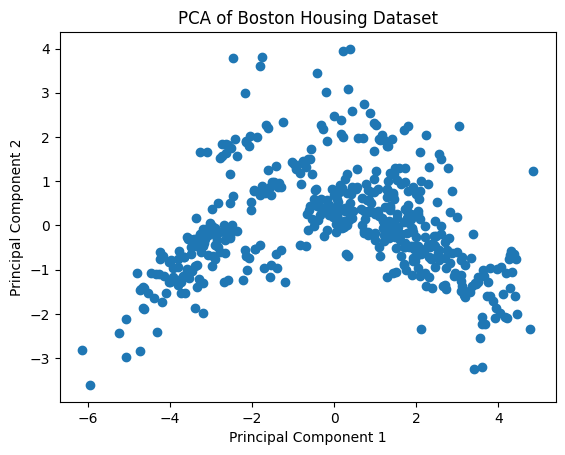

In [ ]:
#Q7 -- Knowing that pca_pd_df contains PC1 and PC2 columns
plt.scatter(pca_pd_df["PC1"], pca_pd_df["PC2"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Boston Housing Dataset")
plt.show()

In [ ]:
#Q8 --- Vectorizing the features and target together for model development.
#Select relevant columns for model development
data = pca_boston.select("pcaFeatures", "medv").withColumnRenamed("pcaFeatures", "features")

#Initialize VectorAssembler
vector_assembler = VectorAssembler(inputCols=["features"], outputCol="features_vector")

#Vectorize features and target together
vector_data = vector_assembler.transform(data)

#Display the transformed DataFrame
vector_data.show(truncate=False)

+-------------------------------------------+----+-------------------------------------------+
|features                                   |medv|features_vector                            |
+-------------------------------------------+----+-------------------------------------------+
|[2.096223030238583,0.7723484263420728]     |24.0|[2.096223030238583,0.7723484263420728]     |
|[1.4558109894474212,0.5913999518264818]    |21.6|[1.4558109894474212,0.5913999518264818]    |
|[2.0725465519481854,0.5990465781004481]    |34.7|[2.0725465519481854,0.5990465781004481]    |
|[2.6089217588643487,-0.0068638262975736246]|33.4|[2.6089217588643487,-0.0068638262975736246]|
|[2.4557547719310775,0.09761534604617053]   |36.2|[2.4557547719310775,0.09761534604617053]   |
|[2.2126618431927714,-0.009477632593783855] |28.7|[2.2126618431927714,-0.009477632593783855] |
|[1.35753765586535,0.34952629171413435]     |22.9|[1.35753765586535,0.34952629171413435]     |
|[0.8412121417133108,0.5772284930996238]    |27.1|

In [ ]:
#Q9 --- Train and Test
#Split dataset into training and testing sets
train_data, test_data = vector_data.randomSplit([0.8, 0.2], seed=1234)

#Display the count of records in each set
print("Training Dataset Count: " + str(train_data.count()))
print("Testing Dataset Count: " + str(test_data.count()))

Training Dataset Count: 395
Testing Dataset Count: 111


In [ ]:
#Q10 --- Fit model for linear regression

#Initialize Linear Regression
lr = LinearRegression(featuresCol="features_vector", labelCol="medv")

#Fit the model on the training data
lr_model = lr.fit(train_data)

#Q11 -- Finding coefficients and intercept
#Print the coefficients and intercept
print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")

Coefficients: [2.3733887107235767,2.474159440164664]
Intercept: 22.333530965296152


In [ ]:
#Q12 --- Evaluating for test dataset
test_results = lr_model.evaluate(test_data)

#Print Root Mean Squared Error (RMSE) and R-squared (R2)
print(f"RMSE: {test_results.rootMeanSquaredError}")
print(f"R2: {test_results.r2}")


RMSE: 7.707455403397243
R2: 0.28694466214941095


         residual
count  111.000000
mean     0.908408
std      7.688446
min    -12.460488
25%     -4.550686
50%     -0.819534
75%      4.405046
max     34.428175


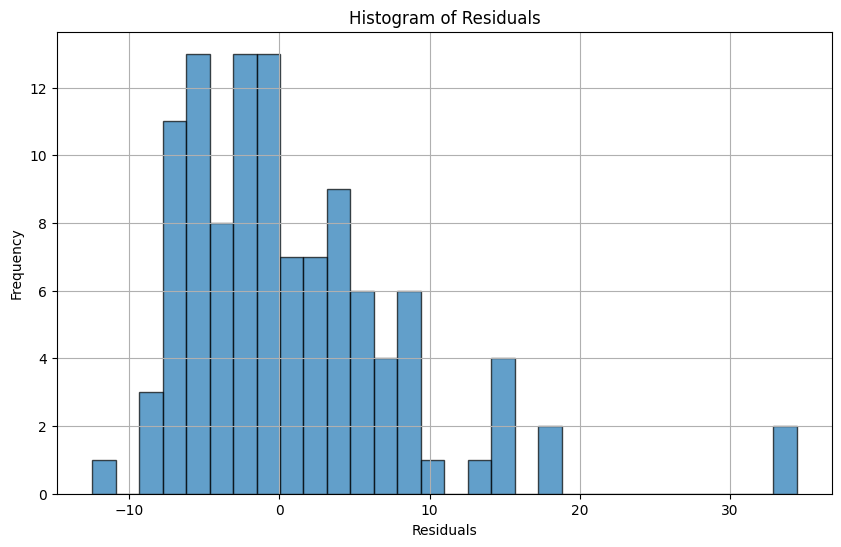

In [ ]:
#Q13 --- Further steps
#a. Residual Analysis

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

#Calculate residuals
predictions = lr_model.transform(test_data)  # Assuming lr_model is already trained

#Calculate residuals
residuals = predictions.withColumn("residual", col("medv") - col("prediction"))

#Convert residuals DataFrame to Pandas DataFrame for analysis
residuals_pd = residuals.select("residual").toPandas()

#Summary statistics of residuals
print(residuals_pd.describe())

#Plot residuals as Histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals_pd["residual"], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()


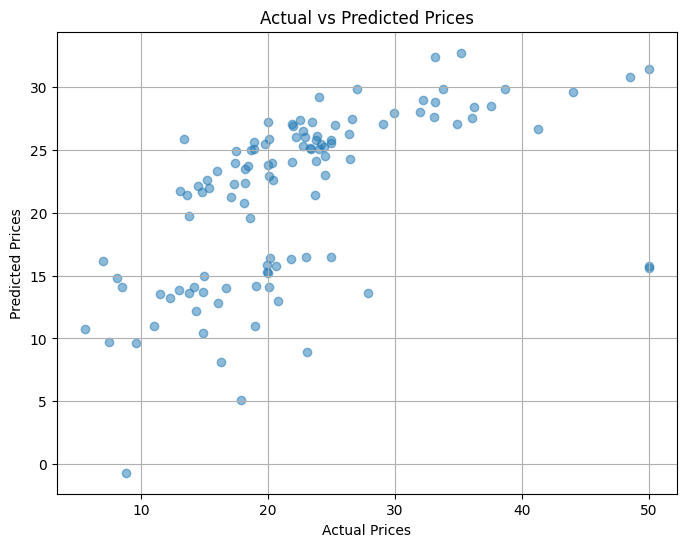

In [ ]:
#Q13 b) Additional Analysis using Prediction vs Actual

import matplotlib.pyplot as plt
import pandas as pd  # Import Pandas explicitly

predictions_pd = predictions.select("medv", "prediction").toPandas()

#Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(predictions_pd["medv"], predictions_pd["prediction"], alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()
